In [3]:
from sklearn import tree
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("iris.csv")

In [5]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

(array([32., 41., 42., 24., 11.]),
 array([4.3 , 5.02, 5.74, 6.46, 7.18, 7.9 ]),
 <a list of 5 Patch objects>)

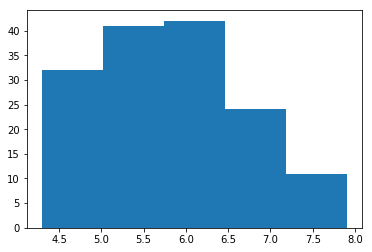

In [7]:
import matplotlib.pyplot as plt
plt.hist(data.iloc[:, 0], 5)

In [58]:
data["sepal.length"] = np.digitize(data.iloc[:, 0], [4.3, 5.02, 5.74, 6.46, 7.18, 7.9])

(array([ 8., 39., 47., 41., 11.,  4.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4]),
 <a list of 6 Patch objects>)

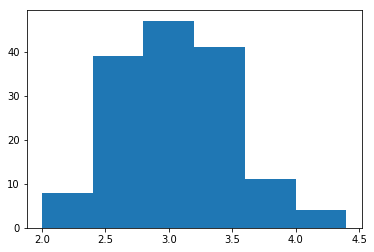

In [33]:
import matplotlib.pyplot as plt
plt.hist(data.iloc[:, 1], 6)

In [57]:
data["sepal.width"] = np.digitize(data.iloc[:, 1], [2, 2.4, 2.8, 3.2, 3.6, 4, 4.4])

(array([50., 11., 61., 28.]),
 array([1.   , 2.475, 3.95 , 5.425, 6.9  ]),
 <a list of 4 Patch objects>)

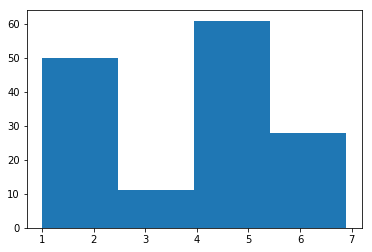

In [40]:
import matplotlib.pyplot as plt
plt.hist(data.iloc[:, 2], 4)

In [56]:
data["petal.length"] = np.digitize(data.iloc[:, 2], [1, 2.475, 3.95, 5.425, 6.9])

(array([50., 15., 51., 34.]),
 array([0.1, 0.7, 1.3, 1.9, 2.5]),
 <a list of 4 Patch objects>)

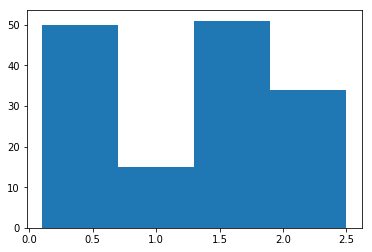

In [52]:
import matplotlib.pyplot as plt
plt.hist(data.iloc[:, 3], 4)

In [55]:
data['petal.width'] = np.digitize(data.iloc[:, 3], [0.1, 0.7, 1.3, 1.9, 2.5])

In [59]:
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,2,4,1,1,Setosa
1,1,3,1,1,Setosa
2,1,4,1,1,Setosa
3,1,3,1,1,Setosa
4,1,5,1,1,Setosa
5,2,5,1,1,Setosa
6,1,4,1,1,Setosa
7,1,4,1,1,Setosa
8,1,3,1,1,Setosa
9,1,3,1,1,Setosa


In [60]:
X = np.array(data.iloc[:,:-1])
Y = np.array(data.iloc[:,-1])
descriptive_features = [x+" (cm)" for x in list(data.columns[:-1])]
target_names = list(set(data.iloc[:,-1]))
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [61]:
tree.export_graphviz(clf, out_file="iris_tree_discretized.dot",
                    feature_names = descriptive_features,
                    class_names = target_names,
                    filled=True, rounded=True,  
                    special_characters=True)

In [63]:
good = 0
for index, row in data.iterrows():
    if row["petal.width"] <= 1.5:
        if row[-1] == "Virginica":
            good += 1
    else:
        if row["petal.width"] <= 3.5:
            if row["petal.length"] <= 3.5:
                if row["petal.width"] <= 2.5:
                    if row[-1] == "Versicolor":
                        good += 1
                else:
                    if row["sepal.length"] <= 1.5:
                        if row[-1] == "Setosa":
                            good += 1
                    else:
                        if row["sepal.length"] <= 2.5:
                            if row[-1] == "Versicolor":
                                good += 1    
                        else:
                            if row["sepal.length"] <= 3.5:
                                if row["sepal.width"] <= 3.5:
                                    if row["sepal.width"] <= 2.5:
                                        if row["sepal.width"] <= 1.5:
                                            if row[-1] == " Versicolor":
                                                good += 1
                                        else:
                                            if row[-1] == "Versicolor":
                                                good += 1
                                    else:
                                        if row[-1] == "Versicolor":
                                            good +=1
                                else:
                                    if row[-1] == " Versicolor":
                                        good += 1
                            else:
                                if row[-1] == "Versicolor":
                                    good += 1
            else:
                if row[-1] == "Setosa":
                    good += 1
        else:
            if row[-1] == "Setosa":
                good += 1

In [64]:
good

44